**THE CONSIDITION 2019 - EXAMPLE SOLUTION**

This notebook serves as a simple starting point for **The Considition 2019** programming competition. It is a modified version of https://nbviewer.jupyter.org/github/fastai/course-v3/blob/master/nbs/dl1/lesson3-camvid.ipynb, from the free fast.ai course *Practical Deep Learning for Coders, v3*.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.callbacks.hooks import *
from pathlib import Path

In [3]:
# download training set from https://theconsidition.se/rules and insert path here
path = Path('./Training_dataset') 

In [4]:
# You might need to pre-process masks here for the model to correctly interpret/classify them
# Any other pre-processing of the dataset you want to do should also go here

In [5]:
# set paths to training images and masks
path_lbl = path/'Masks/all'
path_img = path/'Images'

In [6]:
# list paths to some training images
fnames = get_image_files(path_img)
fnames[:3]

[PosixPath('Training_dataset/Images/zanzibar_4_26_27.jpg'),
 PosixPath('Training_dataset/Images/zanzibar_4_03_17.jpg'),
 PosixPath('Training_dataset/Images/Monrovia_1_06_14.jpg')]

In [7]:
# list paths to some training masks
lbl_names = get_image_files(path_lbl)
lbl_names[:3]

[PosixPath('Training_dataset/Masks/all/coxs_1_17_03.png'),
 PosixPath('Training_dataset/Masks/all/zanzibar_4_13_15.png'),
 PosixPath('Training_dataset/Masks/all/zanzibar_4_34_07.png')]

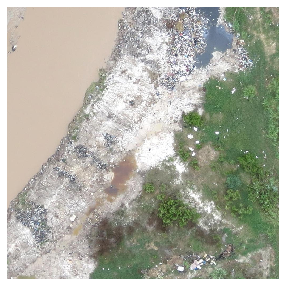

In [8]:
# show a training image
img_f = fnames[0]
img = open_image(img_f)
img.show(figsize=(5,5))

In [9]:
# helper function to get the corresponding mask path of a training image
get_y_fn = lambda x: path_lbl/f'{x.stem}.png'

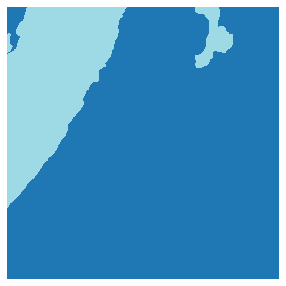

In [10]:
# show the mask
mask = open_mask(get_y_fn(img_f))
mask.show(figsize=(5,5), alpha=1)

In [11]:
# create an indexed list, where the index of each label corresponds to the pixel values of the masks
codelist = ['Background', 'Water', 'Building', 'Road']
codes = np.asarray(codelist); codes

array(['Background', 'Water', 'Building', 'Road'], dtype='<U10')

In [12]:
# create the data object
data = (SegmentationItemList.from_folder(path_img)
        .split_by_rand_pct()
        .label_from_func(get_y_fn, classes=codes)
        .transform(get_transforms(), size=128)
        .databunch(bs=4, num_workers=0)
        .normalize(imagenet_stats))

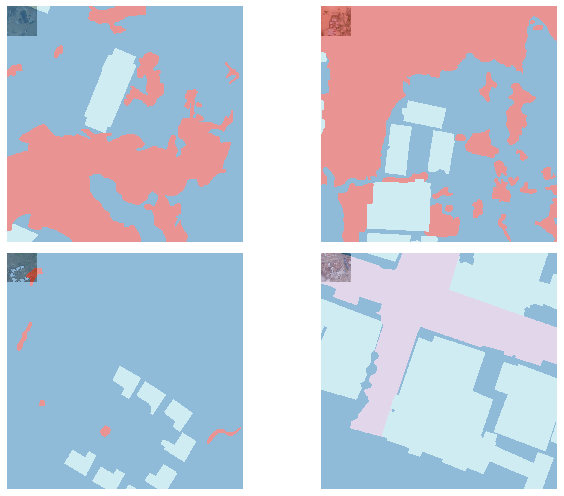

In [13]:
# show some masks superimposed on their respective images
data.show_batch(2, figsize=(10,7))

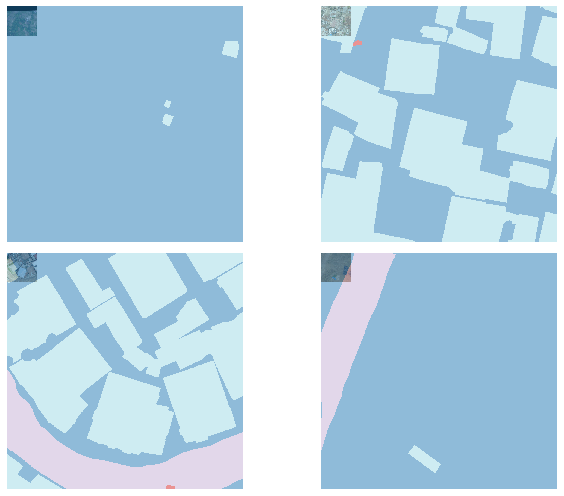

In [14]:
data.show_batch(2, figsize=(10,7), ds_type=DatasetType.Valid)

In [15]:
# create a learner using the Unet architecture. Model pretrained on ImageNet
learn = unet_learner(data, models.resnet18, wd=1e-2, metrics=accuracy_thresh)

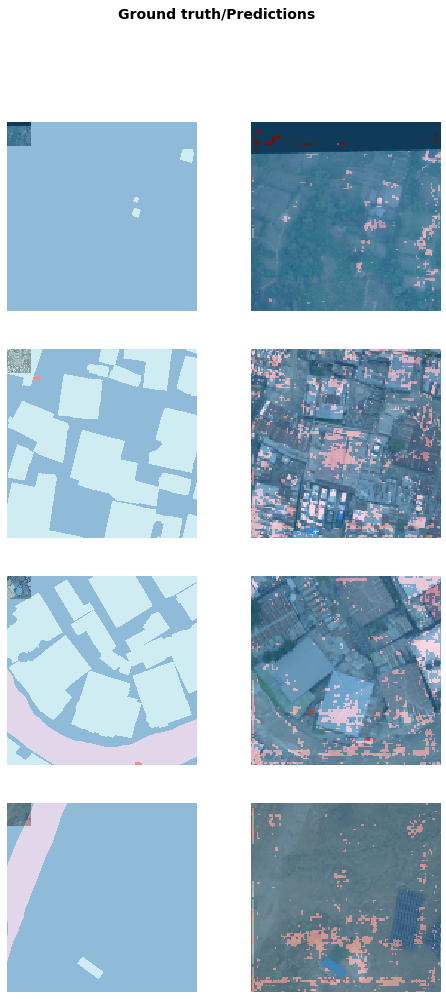

In [16]:
# show some predictions from your current model, next to the ground-truth masks
learn.show_results()

In [17]:
# TODO: Your model is now ready to be trained on your training dataset
# to further improve its performance for the competition!

In [39]:
# save your model's current state
learn.path = path
learn.save

<bound method Learner.save of Learner(data=ImageDataBunch;

Train: LabelList (1336 items)
x: SegmentationItemList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: SegmentationLabelList
ImageSegment (1, 1024, 1024),ImageSegment (1, 1024, 1024),ImageSegment (1, 1024, 1024),ImageSegment (1, 1024, 1024),ImageSegment (1, 1024, 1024)
Path: Training_dataset/Images;

Valid: LabelList (334 items)
x: SegmentationItemList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: SegmentationLabelList
ImageSegment (1, 1024, 1024),ImageSegment (1, 1024, 1024),ImageSegment (1, 1024, 1024),ImageSegment (1, 1024, 1024),ImageSegment (1, 1024, 1024)
Path: Training_dataset/Images;

Test: None, model=DynamicUnet(
  (layers): ModuleList(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, 

In [41]:
# export your learner/model, so it can be used for inference in other applications
learn.export('trained_model.pkl')
print(learn.path)

Training_dataset
